In [1]:
raw_data= open('1.txt').read()

In [2]:
raw_data

"Business transformation solutions and insights: PwC\n\nIndustries\nServices\nIssues\nAbout us\nCareers\nIndustries\nSee all industries\nAerospace, defence & security\nAutomotive\nCapital projects & infrastructure\nConsumer markets\nEnergy, utilities & resources\nEngineering & construction\nFinancial services\nForest, paper & packaging\nGovernment & public services\nHealthcare\nHospitality & leisure\nIndustrial manufacturing\nInsurance\nPharmaceuticals & life sciences\nPrivate equity\nTechnology, media & Telecommunications\nTransportation & logistics\n\n\n\n\n\n\n\n\n Menu\n\n\nIndustries\n\nSee all industries\n\nAerospace, defence & security\n\n\nAutomotive\n\n\nCapital projects & infrastructure\n\n\nConsumer markets\n\nEnergy, utilities & resources\n\n\nChemicals\nMining & Metals\nOil & gas\nPower & utilities\n\n\nEngineering & construction\n\nFinancial services\n\n\nAsset & wealth management\nBanking & capital markets\nInsurance\n\nForest, paper & packaging\n\n\nGovernment & public 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

import re
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix

In [4]:
data=pd.Series(raw_data)

In [5]:
data

0    Business transformation solutions and insights...
dtype: object

In [6]:
data_processed= data.apply(lambda x: re.sub(r'[^a-zA-Z/s]+',' ',x).lower())
data_processed

0    business transformation solutions and insights...
dtype: object

In [7]:
stop_words= stopwords.words('english')

In [8]:
from nltk import word_tokenize

In [9]:
data_final = data_processed.apply(lambda x:' '.join([word for word in word_tokenize(x) if word not in stop_words and len(word)>2]))

In [10]:
data_final

0    business transformation solutions insights pwc...
dtype: object

In [11]:
words_list = []
for sentence in data_final:
    words_list.extend(nltk.word_tokenize(sentence))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common()

[('menu', 45),
 ('transformation', 37),
 ('strategy', 33),
 ('services', 32),
 ('business', 21),
 ('value', 20),
 ('issues', 18),
 ('technology', 18),
 ('people', 15),
 ('pwc', 13),
 ('digital', 13),
 ('tax', 11),
 ('capabilities', 11),
 ('global', 10),
 ('organisation', 10),
 ('creation', 10),
 ('growth', 10),
 ('new', 9),
 ('learn', 9),
 ('see', 8),
 ('workforce', 8),
 ('help', 8),
 ('insights', 7),
 ('shape', 7),
 ('management', 6),
 ('survey', 6),
 ('strategic', 6),
 ('fit', 6),
 ('solutions', 5),
 ('industries', 5),
 ('capital', 5),
 ('markets', 5),
 ('deals', 5),
 ('legal', 5),
 ('sustainability', 5),
 ('change', 5),
 ('governance', 5),
 ('leadership', 5),
 ('esg', 5),
 ('take', 5),
 ('outcomes', 5),
 ('beyond', 5),
 ('performance', 5),
 ('future', 5),
 ('maturity', 5),
 ('private', 4),
 ('featured', 4),
 ('net', 4),
 ('zero', 4),
 ('alliances', 4),
 ('ecosystems', 4),
 ('audit', 4),
 ('consulting', 4),
 ('corporate', 4),
 ('risk', 4),
 ('operations', 4),
 ('impact', 4),
 ('annua

In [12]:
words_list

['business',
 'transformation',
 'solutions',
 'insights',
 'pwc',
 'industries',
 'services',
 'issues',
 'careers',
 'industries',
 'see',
 'industries',
 'aerospace',
 'defence',
 'security',
 'automotive',
 'capital',
 'projects',
 'infrastructure',
 'consumer',
 'markets',
 'energy',
 'utilities',
 'resources',
 'engineering',
 'construction',
 'financial',
 'services',
 'forest',
 'paper',
 'packaging',
 'government',
 'public',
 'services',
 'healthcare',
 'hospitality',
 'leisure',
 'industrial',
 'manufacturing',
 'insurance',
 'pharmaceuticals',
 'life',
 'sciences',
 'private',
 'equity',
 'technology',
 'media',
 'telecommunications',
 'transportation',
 'logistics',
 'menu',
 'industries',
 'see',
 'industries',
 'aerospace',
 'defence',
 'security',
 'automotive',
 'capital',
 'projects',
 'infrastructure',
 'consumer',
 'markets',
 'energy',
 'utilities',
 'resources',
 'chemicals',
 'mining',
 'metals',
 'oil',
 'gas',
 'power',
 'utilities',
 'engineering',
 'construct

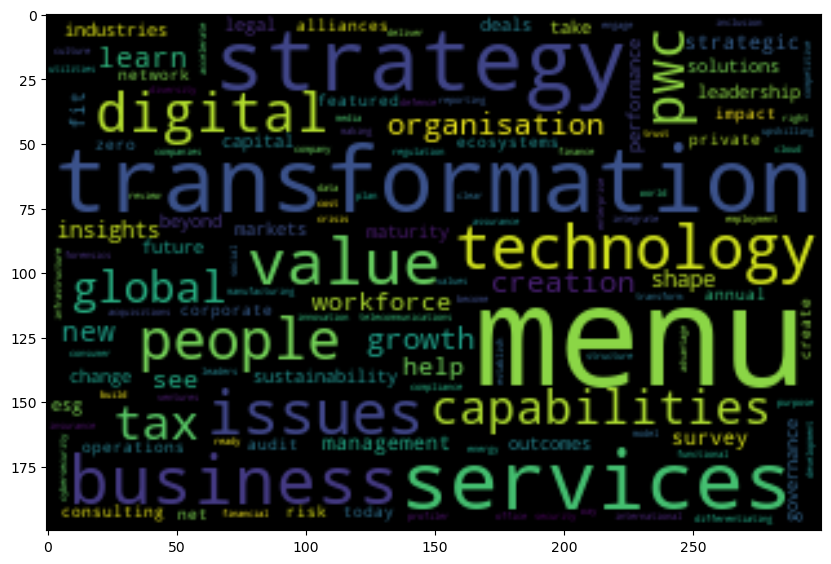

In [13]:
from wordcloud import WordCloud
import wordcloud

wcloud_fig = WordCloud( stopwords = set(wordcloud.STOPWORDS), colormap = 'viridis', width = 300 , height = 200).generate_from_frequencies(freq_dist)

#plotting the wordcloud
plt.figure(figsize=(10,7), frameon=True)

plt.imshow(wcloud_fig, interpolation = 'bilinear')
plt.show()

In [14]:
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim import models

In [15]:
words_sent = [x.split() for x in data_final]
words_sent
bigram= Phrases(words_sent, min_count=5, threshold=100)
trigram= Phrases(bigram[words_sent], threshold=100)

bigram_phraser= Phraser(bigram)
trigram_phraser= Phraser(trigram)

#bag of words for creating bigram and trigram

bow=[trigram_phraser[bigram_phraser[word]] for word in words_sent]

In [16]:
bow[0:1]

[['business',
  'transformation',
  'solutions',
  'insights',
  'pwc',
  'industries',
  'services',
  'issues',
  'careers',
  'industries',
  'see',
  'industries',
  'aerospace',
  'defence',
  'security',
  'automotive',
  'capital',
  'projects',
  'infrastructure',
  'consumer',
  'markets',
  'energy',
  'utilities',
  'resources',
  'engineering',
  'construction',
  'financial',
  'services',
  'forest',
  'paper',
  'packaging',
  'government',
  'public',
  'services',
  'healthcare',
  'hospitality',
  'leisure',
  'industrial',
  'manufacturing',
  'insurance',
  'pharmaceuticals',
  'life',
  'sciences',
  'private',
  'equity',
  'technology',
  'media',
  'telecommunications',
  'transportation',
  'logistics',
  'menu',
  'industries',
  'see',
  'industries',
  'aerospace',
  'defence',
  'security',
  'automotive',
  'capital',
  'projects',
  'infrastructure',
  'consumer',
  'markets',
  'energy',
  'utilities',
  'resources',
  'chemicals',
  'mining',
  'metals'

In [17]:
import spacy
nlp= spacy.load('en_core_web_sm', disable=['parser','ner'])
doc= nlp(' '.join(bow[0]))
for token in doc:
    print(token, '=>', token.pos_)

business => NOUN
transformation => NOUN
solutions => NOUN
insights => NOUN
pwc => PROPN
industries => NOUN
services => NOUN
issues => NOUN
careers => NOUN
industries => NOUN
see => VERB
industries => NOUN
aerospace => NOUN
defence => PROPN
security => NOUN
automotive => ADJ
capital => NOUN
projects => NOUN
infrastructure => NOUN
consumer => NOUN
markets => NOUN
energy => NOUN
utilities => NOUN
resources => NOUN
engineering => NOUN
construction => NOUN
financial => ADJ
services => NOUN
forest => NOUN
paper => NOUN
packaging => NOUN
government => NOUN
public => ADJ
services => NOUN
healthcare => NOUN
hospitality => NOUN
leisure => NOUN
industrial => ADJ
manufacturing => NOUN
insurance => NOUN
pharmaceuticals => NOUN
life => PROPN
sciences => VERB
private => ADJ
equity => NOUN
technology => NOUN
media => NOUN
telecommunications => NOUN
transportation => NOUN
logistics => PROPN
menu => PROPN
industries => NOUN
see => VERB
industries => NOUN
aerospace => NOUN
defence => PROPN
security => NO

In [18]:
def lemmatization(texts, tags=['NOUN','ADJ','VERB','ADV','PROPN']):
    texts_out= []
    for sent in texts:
        doc= nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in tags])
    return texts_out

In [19]:
bag_of_words = lemmatization(bow)

In [20]:
#this gives us the keywords
bag_of_words

[['business',
  'transformation',
  'solution',
  'insight',
  'pwc',
  'industry',
  'service',
  'issue',
  'career',
  'industry',
  'see',
  'industry',
  'aerospace',
  'defence',
  'security',
  'automotive',
  'capital',
  'project',
  'infrastructure',
  'consumer',
  'market',
  'energy',
  'utility',
  'resource',
  'engineering',
  'construction',
  'financial',
  'service',
  'forest',
  'paper',
  'packaging',
  'government',
  'public',
  'service',
  'healthcare',
  'hospitality',
  'leisure',
  'industrial',
  'manufacturing',
  'insurance',
  'pharmaceutical',
  'life',
  'science',
  'private',
  'equity',
  'technology',
  'medium',
  'telecommunication',
  'transportation',
  'logistics',
  'menu',
  'industry',
  'see',
  'industry',
  'aerospace',
  'defence',
  'security',
  'automotive',
  'capital',
  'project',
  'infrastructure',
  'consumer',
  'market',
  'energy',
  'utility',
  'resource',
  'chemical',
  'mining',
  'metal',
  'oil',
  'gas',
  'power',


In [21]:
from gensim import corpora
id2word = corpora.Dictionary(bag_of_words)
print(id2word)

Dictionary(447 unique tokens: ['ability', 'accelerate', 'achieve', 'acquisition', 'actuarial']...)
